Question 1: What is Simple Linear Regression?

Answer: Simple Linear Regression is a basic yet powerful statistical method used to examine the relationship between two continuous variables - one independent variable (x) and one dependent variable (y). The main goal is to find the best-fitting straight line that predicts the value of the dependent variable based on the independent variable.

The equation of a simple linear regression line is:

y = mx + c

where,
y = Dependent variable (the outcome or value we want to predict),

x = Independent variable (the predictor or input variable),

m = Slope of the line, which shows how much y changes when x changes by one unit,

c = Intercept, which represents the value of y when x = 0.

Question 2: What are the key assumptions of Simple Linear Regression?

Answer: Simple Linear Regression is based on several key assumptions that must be satisfied to ensure that the model produces valid and reliable results. These assumptions are as follows:

1) Linearity: There should be a linear relationship between the independent variable (x) and the dependent variable (y). This means that the change in y is proportional to the change in x.

2) Independence: The observations or data points should be independent of each other. In other words, the value of one observation should not influence another.

3) Homoscedasticity (Constant Variance): The variance of the residuals (errors) should remain constant across all levels of the independent variable. If the spread of errors increases or decreases with x, it indicates heteroscedasticity.

4) Normality of Errors: The residuals (differences between observed and predicted values) should be approximately normally distributed. This helps in making valid statistical inferences.

5) No Multicollinearity: Since Simple Linear Regression involves only one independent variable, this assumption is automatically satisfied. However, in multiple regression, independent variables should not be highly correlated.

6) No Autocorrelation: The residuals should not be correlated with each other, especially in time series data. Autocorrelation violates the independence assumption.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Answer: Heteroscedasticity refers to a condition in regression analysis where the variance of the residuals (errors) is not constant across all levels of the independent variable. In simple terms, it means that the spread of errors changes as the values of the independent variable change. Ideally, a good regression model should have equal variance of residuals, known as homoscedasticity.

When heteroscedasticity is present, it violates one of the key assumptions of linear regression, making the model's estimates less reliable. It can cause the standard errors of the regression coefficients to become biased, which in turn affects hypothesis testing and confidence intervals, leading to incorrect conclusions. For example, in predicting income based on years of education, the variability in income might increase with higher education levels, indicating heteroscedasticity.

Addressing this issue is crucial for accurate and trustworthy results, and it can be done by transforming variables (such as using a logarithmic scale), applying weighted least squares, or using robust standard errors to correct for unequal variance.

Question 4: What is Multiple Linear Regression?

Answer: Multiple Linear Regression is an extension of Simple Linear Regression that is used to study the relationship between one dependent variable and two or more independent variables. It helps in understanding how multiple factors together influence the outcome variable and in predicting its value based on the given inputs.

The general equation for a multiple linear regression model is:

y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n + ε

where,

y is the dependent variable (the outcome or value to be predicted),

x_1, x_2, ... , x_n are the independent variables (predictors or input variables),

b₀ is intercept (the value of y when all independent variables are zero),

b₁, b₂, ..., bₙ are regression coefficients showing the change in y for a one-unit change in each x, keeping others constant,

ε is the error term (represents random variation not explained by the model).

Question 5: What is polynomial regression, and how does it differ from linear
regression?

Answer: Polynomial Regression is a type of regression analysis that models the relationship between the independent variable (x) and the dependent variable (y) as an nth-degree polynomial. Unlike Simple Linear Regression, which fits a straight line to the data, Polynomial Regression can fit curved relationships by including higher-order terms (such as x^2, x^3 etc.) of the independent variable.

The general equation for a polynomial regression model is:

y = b_0 + b_1 x + b_2 x^2 + b_3 x^3 + ⋯ + b_n x^n + ε

where,

y = Dependent variable (the value to be predicted)

x = Independent variable (the input variable)

b₀, b₁, b₂, ..., bₙ = Coefficients that represent the contribution of each term

n = Degree of the polynomial

ε = Error term

Difference from Linear Regression:

Linear Regression assumes a straight-line relationship between x and y, meaning that changes in y are proportional to changes in x. On the other hand, Polynomial Regression allows for a nonlinear relationship by adding polynomial terms, enabling the model to capture curves or bends in the data.

For example, if data points form a U-shaped or parabolic pattern, Polynomial Regression will fit the curve more accurately than a straight-line model. However, increasing the polynomial degree too much can lead to overfitting, where the model fits the training data too closely but performs poorly on new data.

Slope (m): 1.9800000000000004
Intercept (c): 0.17999999999999794


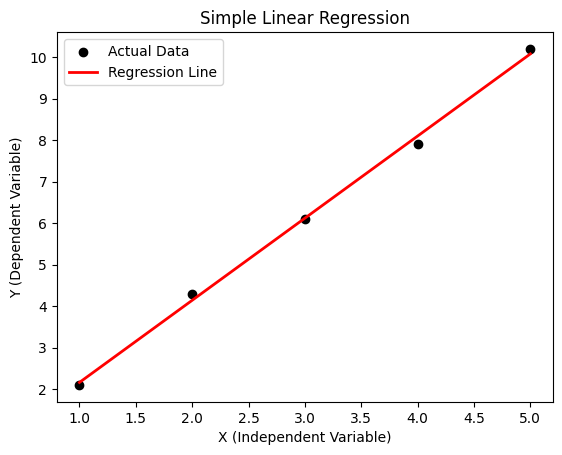

In [2]:
# Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
#  X = [1, 2, 3, 4, 5]
#  Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

# Answer :

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

plt.scatter(X, Y, color='black', label='Actual Data')

plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [5]:
# Question 7: Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000]
# Rooms = [2, 3, 3, 4]
# Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results

# Answer:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']

model = LinearRegression()
model.fit(X, Y)

print("Intercept (b₀):", model.intercept_)
print("Coefficients (b₁, b₂):", model.coef_)

# Checking for multicollinearity using VIF
# Adding constant term for VIF calculation
X_with_const = sm.add_constant(X)

# Computing VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)

Intercept (b₀): 103157.89473684214
Coefficients (b₁, b₂): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Intercept (b₀): 0.06000000000000938
Coefficients (b₁, b₂): [0.   1.94 0.2 ]


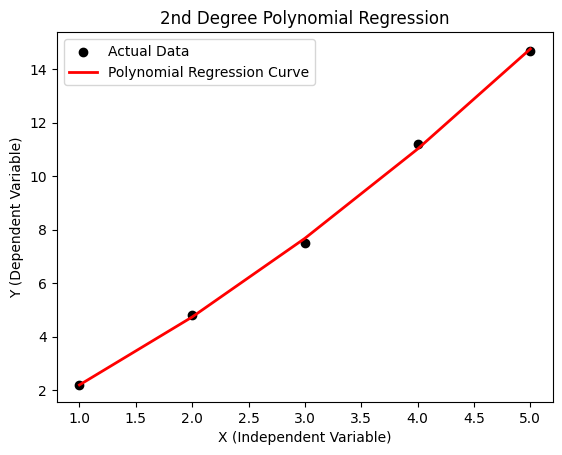

In [7]:
# Question 8: Implement polynomial regression on the following data:
# X = [1, 2, 3, 4, 5]
# Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

# Answer:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transforming features to include polynomial terms (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Intercept (b₀):", model.intercept_)
print("Coefficients (b₁, b₂):", model.coef_)

plt.scatter(X, Y, color='black', label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('2nd Degree Polynomial Regression')
plt.legend()
plt.show()

Slope (m): 1.1500000000000001
Intercept (c): 6.499999999999993
Residuals: [-3.   5.5 -1.  -2.5  1. ]


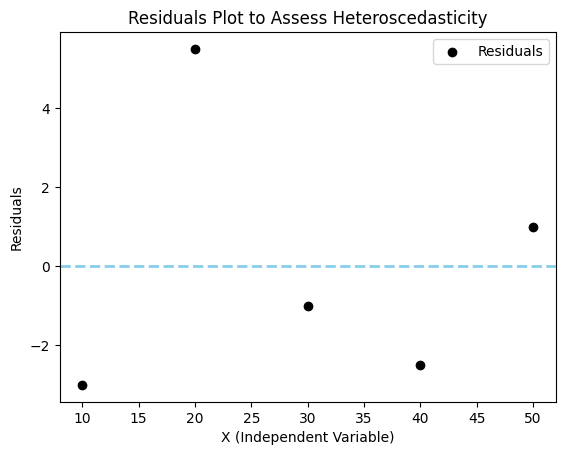

In [11]:
# Question 9: Create a residuals plot for a regression model trained on this data:
# X = [10, 20, 30, 40, 50]
# Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals

# Answer:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
print("Residuals:", residuals)

plt.scatter(X, residuals, color='black', label='Residuals')
plt.axhline(y=0, color='skyblue', linestyle='--', linewidth=2)
plt.xlabel('X (Independent Variable)')
plt.ylabel('Residuals')
plt.title('Residuals Plot to Assess Heteroscedasticity')
plt.legend()
plt.show()

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Answer: Heteroscedasticity occurs when the variance of the residuals (errors) is not constant across different levels of the independent variables. This can lead to inefficient estimates and unreliable statistical inferences.To address this issue:

1) Transform Variables: Apply transformations such as logarithmic, square root, or Box-Cox on the dependent variable (Price) or independent variables (Area, Rooms) to stabilize the variance.Example: Using log(Price) instead of Price.

2) Use Weighted Least Squares (WLS): Assign different weights to observations, giving less weight to those with higher variance, to make residual variance more uniform.

3) Use Robust Standard Errors: Apply heteroscedasticity-consistent (robust) standard errors to ensure hypothesis tests and confidence intervals remain valid even when variance is unequal.

4) Check Model Specification: Sometimes heteroscedasticity arises because a key variable or interaction term is missing. Review and refine the model to include relevant predictors (like “Location Quality” or “Property Age”).

Multicollinearity occurs when two or more independent variables are highly correlated (e.g., “Area” and “Number of Rooms”). This leads to unstable coefficient estimates and makes it hard to interpret variable importance. To address multicollinearity:

1) Check Correlation and VIF (Variance Inflation Factor): Identify variables with high correlation and compute VIF. A VIF above 5 or 10 usually indicates strong multicollinearity.

2) Remove or Combine Correlated Variables: Drop one of the correlated variables or combine them into a single feature (e.g., average room size = area / number of rooms).

3) Use Regularization Techniques: Apply Ridge Regression or Lasso Regression, which add penalty terms to reduce the impact of correlated predictors and stabilize coefficient estimates.

4) Apply Principal Component Analysis (PCA): Use PCA to transform correlated features into a smaller set of uncorrelated components while retaining most of the information.

After addressing both issues we will refit the regression model with the corrected data or techniques and re-examine residual plots and VIF values to ensure improvements.Validation the model using cross-validation or hold-out testing to confirm predictive reliability will be carried out.